In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [52]:
df = pd.read_csv("claims_q12023.csv", sep=';')

In [53]:
df.head()

,cust_age,policy_id,coverage_start_date,cust_region,sum_assured_group,ins_deductible,annual_prem,zip_code,insured_sex,edu_lvl,...,bodily_injuries,witnesses,police_report_avlbl,total_claim_amount,injury_claim,property_claim,vehicle_claim,car_brand,car_model,production_year
0,44,225016,08.09.2007,north,mid,2000,1007.48,342178,F,college,...,0,2,YES,74140,13480,13480,47180,BMW,X5,2022
1,56,316183,02.02.2016,north,mid,500,1080.60,506682,F,phd,...,2,3,NaN,56430,0,6270,50160,Honda,CRV,2021
2,28,174430,04.02.2020,east,mid,2000,1078.03,330854,M,high school,...,0,1,YES,53600,6700,6700,40200,Volkswagen,Jetta,2014
3,53,67527,27.01.2013,north,low,1000,1026.55,502272,F,college,...,0,0,NO,80960,14720,7360,58880,Accura,MDX,2007
4,47,259758,08.04.2015,east,mid,2000,1484.15,515656,F,associate,...,2,3,NaN,64100,12820,6410,44870,Dodge,RAM,2021


In [54]:
df.shape

(1000, 29)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_age               1000 non-null   int64  
 1   policy_id              1000 non-null   int64  
 2   coverage_start_date    1000 non-null   object 
 3   cust_region            1000 non-null   object 
 4   sum_assured_group      1000 non-null   object 
 5   ins_deductible         1000 non-null   int64  
 6   annual_prem            1000 non-null   float64
 7   zip_code               1000 non-null   int64  
 8   insured_sex            1000 non-null   object 
 9   edu_lvl                1000 non-null   object 
 10  marital_status         1000 non-null   object 
 11  claim_incurred_date    1000 non-null   object 
 12  claim_type             1000 non-null   object 
 13  acc_type               822 non-null    object 
 14  emg_services_notified  1000 non-null   object 
 15  incid

## Descriptive Statistics

In [56]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='viridis')\
                             .background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
cust_age,1000.000000,38.948000,9.140287,19.000000,32.000000,38.000000,44.000000,64.000000
policy_id,1000.000000,329024.993000,154237.807437,61764.000000,202870.000000,321160.000000,456741.750000,600943.000000
ins_deductible,1000.000000,1136.000000,611.864673,500.000000,500.000000,1000.000000,2000.000000,2000.000000
annual_prem,1000.000000,1254.516150,244.167395,431.440000,1087.717500,1255.310000,1413.805000,2045.700000
zip_code,1000.000000,401182.488000,71701.610941,330072.000000,348372.500000,366413.500000,503219.000000,520930.000000
incident_hour,1000.000000,11.644000,6.951373,0.000000,6.000000,12.000000,17.000000,23.000000
num_vehicles_involved,1000.000000,1.839000,1.018880,1.000000,1.000000,1.000000,3.000000,4.000000
bodily_injuries,1000.000000,0.988000,0.818857,0.000000,0.000000,1.000000,2.000000,2.000000
witnesses,1000.000000,1.487000,1.111335,0.000000,1.000000,1.000000,2.000000,3.000000
total_claim_amount,1000.000000,52944.201000,26880.796007,100.000000,41812.500000,58055.000000,70592.500000,151632.000000


In [57]:
df['coverage_start_date'] = pd.to_datetime(df['coverage_start_date'], format='%d.%m.%Y')
df['coverage_start_date'].describe()

count                    1000
unique                    952
top       1999-07-11 00:00:00
freq                        3
first     1997-03-23 00:00:00
last      2022-12-28 00:00:00
Name: coverage_start_date, dtype: object

In [58]:
df['cust_region'].value_counts()

east     352
west     338
north    310
Name: cust_region, dtype: int64

In [59]:
df['sum_assured_group'].value_counts()

mid     349
low     347
high    304
Name: sum_assured_group, dtype: int64

In [60]:
df['insured_sex'].value_counts()

F    535
M    465
Name: insured_sex, dtype: int64

In [61]:
df['claim_incurred_date'] = pd.to_datetime(df['claim_incurred_date'], format='%d.%m.%Y')
df['claim_incurred_date'].describe()

count                    1000
unique                     60
top       2023-02-02 00:00:00
freq                       28
first     2023-01-01 00:00:00
last      2023-03-01 00:00:00
Name: claim_incurred_date, dtype: object

In [62]:
df['claim_type'].value_counts()

multi-vehicle collision     419
single vehicle collision    403
theft                        94
parked car                   84
Name: claim_type, dtype: int64

In [63]:
df['acc_type'].value_counts()

rear collision     292
side collision     276
front collision    254
Name: acc_type, dtype: int64

In [64]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [65]:
df['incident_hour'].value_counts()

17    54
3     53
0     52
23    51
16    49
10    46
13    46
4     46
6     44
9     43
14    43
21    42
18    41
19    40
12    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour, dtype: int64

In [66]:
df['num_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: num_vehicles_involved, dtype: int64

In [67]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [68]:
df['bodily_injuries'].value_counts()

0    341
1    330
2    329
Name: bodily_injuries, dtype: int64

In [69]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

In [70]:
df['police_report_avlbl'].value_counts()

NO     343
YES    314
Name: police_report_avlbl, dtype: int64

In [71]:
df['car_brand'].value_counts()

Saab          80
Subaru        80
Dodge         79
Nissan        78
Chevrolet     76
BMW           73
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        67
Jeep          67
Mercedes      66
Honda         55
Name: car_brand, dtype: int64

In [72]:
df['car_model'].value_counts()

RAM               43
Wrangler          42
A3                37
MDX               36
Neon              36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
E400              28
Camry             28
Forrestor         28
92x               28
F150              27
95                27
Grand Cherokee    25
93                25
Maxima            24
Escape            24
Tahoe             24
X5                24
Ultima            23
Highlander        22
Silverado         22
Civic             22
Fusion            21
Corolla           20
CRV               20
ML350             20
Impreza           20
TL                19
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: car_model, dtype: int64

In [73]:
df['production_year'].value_counts()

2002    56
2006    55
2012    54
2018    53
2013    53
2014    52
2010    51
2017    51
2016    50
2020    49
2009    48
2022    47
2019    47
2004    45
2015    45
2021    44
2007    42
2008    42
2005    40
2011    39
2003    37
Name: production_year, dtype: int64

## DATA CLEANING

In [74]:
df=df.replace("?",np.NaN)

In [75]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_table = pd.DataFrame({'Missing Values': mis_val})
    
    # Remove rows with no missing values
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] != 0]
    
    print(f"Dataframe has {df.shape[1]} columns.\n"
          f"There are {mis_val_table.shape[0]} columns that have missing values.")
    
    return mis_val_table

missing_values = missing_values_table(df)
missing_values

Dataframe has 29 columns.
There are 3 columns that have missing values.


,Missing Values
acc_type,178
property_damage,360
police_report_avlbl,343


In [76]:
df['acc_type']=df['acc_type'].fillna(df['acc_type'].mode()[0])

In [77]:
# If there was property loss,then the report would have been filed.So,we can consider missing value as "NO"
df['property_damage']=df['property_damage'].fillna("NO")

In [78]:
# If there was police reported,then the report would have been filed.So,we can consider missing value as "NO"
df['police_report_avlbl']=df['property_damage'].fillna("NO")

In [79]:
# Checking missing value again
round(100*(df.isnull().sum()/len(df.index)),2)

cust_age                 0.0
policy_id                0.0
coverage_start_date      0.0
cust_region              0.0
sum_assured_group        0.0
ins_deductible           0.0
annual_prem              0.0
zip_code                 0.0
insured_sex              0.0
edu_lvl                  0.0
marital_status           0.0
claim_incurred_date      0.0
claim_type               0.0
acc_type                 0.0
emg_services_notified    0.0
incident_city            0.0
incident_hour            0.0
num_vehicles_involved    0.0
property_damage          0.0
bodily_injuries          0.0
witnesses                0.0
police_report_avlbl      0.0
total_claim_amount       0.0
injury_claim             0.0
property_claim           0.0
vehicle_claim            0.0
car_brand                0.0
car_model                0.0
production_year          0.0
dtype: float64

## ADDING NEW FEATURES

In [80]:
# Calculate the age of the vehicle at the time of the incident
df['vehicle_age_at_incident'] = 2023 - df['production_year']

# Identify whether the incident occurred during the day or night
df['incident_period'] = df['incident_hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Creating a new feature based on the ratio of total_claim_amount to annual_prem
df['claim_ratio'] = df['total_claim_amount'] / df['annual_prem']

# Creating a new feature with age groups
df['age_group'] = pd.cut(df['cust_age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-39', '40-49', '50-59', '60+'])

# Creating a new feature with age groups for vehicels
df['age_group_vehicle'] = pd.cut(df['vehicle_age_at_incident'], bins=[0, 5, 10, 15, 20, 100], labels=['<5', '5-10', '10-15', '15-20', '20+'])

# Creating a new feature with edu level groups
edu_lvl_mapping = {
    'high school': 1,
    'associate': 2,
    'college': 2,
    'masters': 2,
    'md': 2,
    'jd': 3,
    'phd': 3
}

# Creating the edu_lvl_numeric variable using the mapping
df['edu_lvl_numeric'] = df['edu_lvl'].map(edu_lvl_mapping)
print(df[['edu_lvl', 'edu_lvl_numeric']].head())

       edu_lvl  edu_lvl_numeric
0      college                2
1          phd                3
2  high school                1
3      college                2
4    associate                2


In [81]:
df

,cust_age,policy_id,coverage_start_date,cust_region,sum_assured_group,ins_deductible,annual_prem,zip_code,insured_sex,edu_lvl,...,vehicle_claim,car_brand,car_model,production_year,vehicle_age_at_incident,incident_period,claim_ratio,age_group,age_group_vehicle,edu_lvl_numeric
0,44,225016,2007-09-08,north,mid,2000,1007.48,342178,F,college,...,47180,BMW,X5,2022,1,Night,73.589550,40-49,<5,2
1,56,316183,2016-02-02,north,mid,500,1080.60,506682,F,phd,...,50160,Honda,CRV,2021,2,Day,52.220988,50-59,<5,3
2,28,174430,2020-02-04,east,mid,2000,1078.03,330854,M,high school,...,40200,Volkswagen,Jetta,2014,9,Night,49.720323,<30,5-10,1
3,53,67527,2013-01-27,north,low,1000,1026.55,502272,F,college,...,58880,Accura,MDX,2007,16,Day,78.866105,50-59,15-20,2
4,47,259758,2015-04-08,east,mid,2000,1484.15,515656,F,associate,...,44870,Dodge,RAM,2021,2,Night,43.189705,40-49,<5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,53,477651,1998-03-03,west,low,2000,1394.54,348690,F,associate,...,36890,Toyota,Camry,2007,16,Day,34.011215,50-59,15-20,2
996,32,265179,2013-11-20,east,high,2000,1255.11,516309,F,high school,...,44560,Subaru,Legacy,2006,17,Night,48.816438,30-39,15-20,1
997,29,182883,2013-09-11,west,low,1000,1521.28,510447,M,masters,...,70920,Jeep,Grand Cherokee,2002,21,Day,62.158183,<30,20+,2
998,56,438442,2009-10-28,west,mid,500,1040.67,516735,M,high school,...,45360,Subaru,Forrestor,2004,19,Night,65.380956,50-59,15-20,1


## SELECTING FEATURES FOR SEGMENTATION

In [82]:
df2 = df
df2

,cust_age,policy_id,coverage_start_date,cust_region,sum_assured_group,ins_deductible,annual_prem,zip_code,insured_sex,edu_lvl,...,vehicle_claim,car_brand,car_model,production_year,vehicle_age_at_incident,incident_period,claim_ratio,age_group,age_group_vehicle,edu_lvl_numeric
0,44,225016,2007-09-08,north,mid,2000,1007.48,342178,F,college,...,47180,BMW,X5,2022,1,Night,73.589550,40-49,<5,2
1,56,316183,2016-02-02,north,mid,500,1080.60,506682,F,phd,...,50160,Honda,CRV,2021,2,Day,52.220988,50-59,<5,3
2,28,174430,2020-02-04,east,mid,2000,1078.03,330854,M,high school,...,40200,Volkswagen,Jetta,2014,9,Night,49.720323,<30,5-10,1
3,53,67527,2013-01-27,north,low,1000,1026.55,502272,F,college,...,58880,Accura,MDX,2007,16,Day,78.866105,50-59,15-20,2
4,47,259758,2015-04-08,east,mid,2000,1484.15,515656,F,associate,...,44870,Dodge,RAM,2021,2,Night,43.189705,40-49,<5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,53,477651,1998-03-03,west,low,2000,1394.54,348690,F,associate,...,36890,Toyota,Camry,2007,16,Day,34.011215,50-59,15-20,2
996,32,265179,2013-11-20,east,high,2000,1255.11,516309,F,high school,...,44560,Subaru,Legacy,2006,17,Night,48.816438,30-39,15-20,1
997,29,182883,2013-09-11,west,low,1000,1521.28,510447,M,masters,...,70920,Jeep,Grand Cherokee,2002,21,Day,62.158183,<30,20+,2
998,56,438442,2009-10-28,west,mid,500,1040.67,516735,M,high school,...,45360,Subaru,Forrestor,2004,19,Night,65.380956,50-59,15-20,1


In [83]:
df2['cust_region'], _ = pd.factorize(df2['cust_region'])
df2['sum_assured_group'], _ = pd.factorize(df2['sum_assured_group'])
df2['insured_sex'], _ = pd.factorize(df['insured_sex'])
df2['edu_lvl'], _ = pd.factorize(df2['edu_lvl'])
df2['marital_status'], _ = pd.factorize(df2['marital_status'])
df2['claim_type'], _ = pd.factorize(df2['claim_type'])
df2['acc_type'], _ = pd.factorize(df2['acc_type'])
df2['emg_services_notified'], _ = pd.factorize(df2['emg_services_notified'])
df2['incident_city'], _ = pd.factorize(df2['incident_city'])
df2['incident_hour'], _ = pd.factorize(df2['incident_hour'])
df2['property_damage'], _ = pd.factorize(df2['property_damage'])
df2['police_report_avlbl'], _ = pd.factorize(df2['police_report_avlbl'])
df2['car_brand'], _ = pd.factorize(df['car_brand'])
df2['car_model'], _ = pd.factorize(df2['car_model'])
df2['incident_period'], _ = pd.factorize(df2['incident_period'])
df2['age_group'], _ = pd.factorize(df2['age_group'])
df2['age_group_vehicle'], _ = pd.factorize(df2['age_group_vehicle'])

In [84]:
df2

,cust_age,policy_id,coverage_start_date,cust_region,sum_assured_group,ins_deductible,annual_prem,zip_code,insured_sex,edu_lvl,...,vehicle_claim,car_brand,car_model,production_year,vehicle_age_at_incident,incident_period,claim_ratio,age_group,age_group_vehicle,edu_lvl_numeric
0,44,225016,2007-09-08,0,0,2000,1007.48,342178,0,0,...,47180,0,0,2022,1,0,73.589550,0,0,2
1,56,316183,2016-02-02,0,0,500,1080.60,506682,0,1,...,50160,1,1,2021,2,1,52.220988,1,0,3
2,28,174430,2020-02-04,1,0,2000,1078.03,330854,1,2,...,40200,2,2,2014,9,0,49.720323,2,1,1
3,53,67527,2013-01-27,0,1,1000,1026.55,502272,0,0,...,58880,3,3,2007,16,1,78.866105,1,2,2
4,47,259758,2015-04-08,1,0,2000,1484.15,515656,0,3,...,44870,4,4,2021,2,0,43.189705,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,53,477651,1998-03-03,2,1,2000,1394.54,348690,0,3,...,36890,7,26,2007,16,1,34.011215,1,2,2
996,32,265179,2013-11-20,1,2,2000,1255.11,516309,0,2,...,44560,9,12,2006,17,0,48.816438,3,2,1
997,29,182883,2013-09-11,2,1,1000,1521.28,510447,1,5,...,70920,8,35,2002,21,1,62.158183,2,4,2
998,56,438442,2009-10-28,2,0,500,1040.67,516735,1,2,...,45360,9,38,2004,19,0,65.380956,1,2,1


In [85]:
# Select specific variables for correlation analysis
selected_variables = ['cust_region','incident_period','claim_ratio','age_group','age_group_vehicle',
                      'sum_assured_group','ins_deductible','annual_prem','insured_sex',
                      'marital_status','claim_type','acc_type','emg_services_notified','incident_city',
                      'num_vehicles_involved','property_damage','bodily_injuries','witnesses',
                      'police_report_avlbl','total_claim_amount','injury_claim','property_claim',
                      'vehicle_claim','car_brand','car_model','edu_lvl_numeric']  

# Create a subset of the DataFrame with selected variables
df_subset = df2[selected_variables]

In [86]:
correlation_matrix = df_subset.corr()

In [87]:
correlation = df_subset.corr()
print(correlation)

                       cust_region  incident_period  claim_ratio  age_group  \
cust_region               1.000000        -0.008156    -0.017342  -0.045161   
incident_period          -0.008156         1.000000    -0.025181   0.031700   
claim_ratio              -0.017342        -0.025181     1.000000  -0.053048   
age_group                -0.045161         0.031700    -0.053048   1.000000   
age_group_vehicle         0.038081        -0.031875    -0.032026   0.031185   
sum_assured_group         0.018888        -0.010041     0.044434  -0.045270   
ins_deductible            0.034943        -0.017532     0.014765  -0.054352   
annual_prem              -0.004033         0.000640    -0.370019  -0.014655   
insured_sex              -0.002542        -0.028676    -0.028388  -0.091052   
marital_status            0.041095        -0.027493     0.006616   0.046871   
claim_type                0.011715         0.036563    -0.626453   0.028787   
acc_type                  0.010905         0.004893 

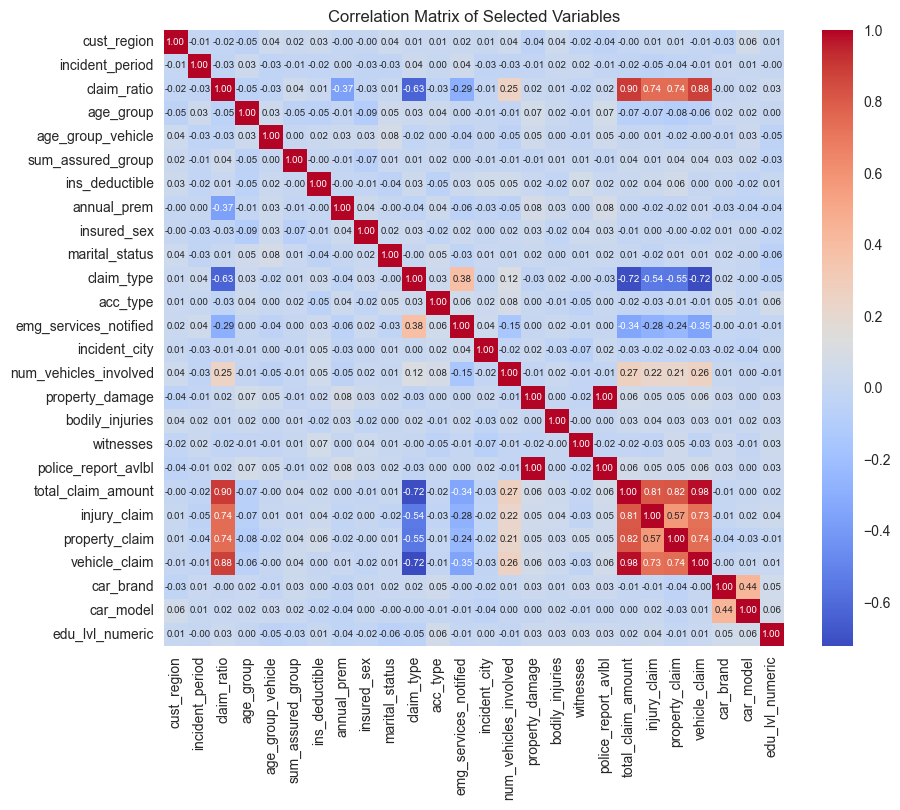

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [89]:
# Selecting features for segmentation model
selected_features = ['age_group',
                     'age_group_vehicle',
                     'edu_lvl_numeric',
                     'total_claim_amount',
                     'num_vehicles_involved',
                     'claim_type',
                     'acc_type',
                     'sum_assured_group',
                     'emg_services_notified']

In [90]:
# Standardizing the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])

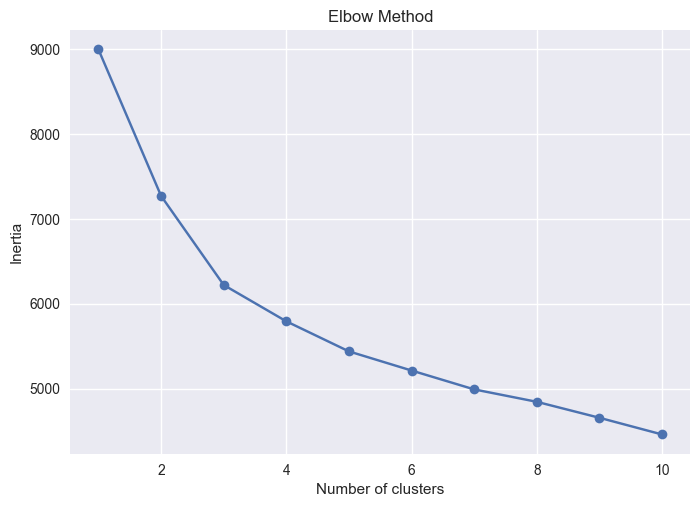

In [91]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [92]:
# Fitting K-means with optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [93]:
# Adding cluster labels to the dataset
df['cluster'] = kmeans.labels_

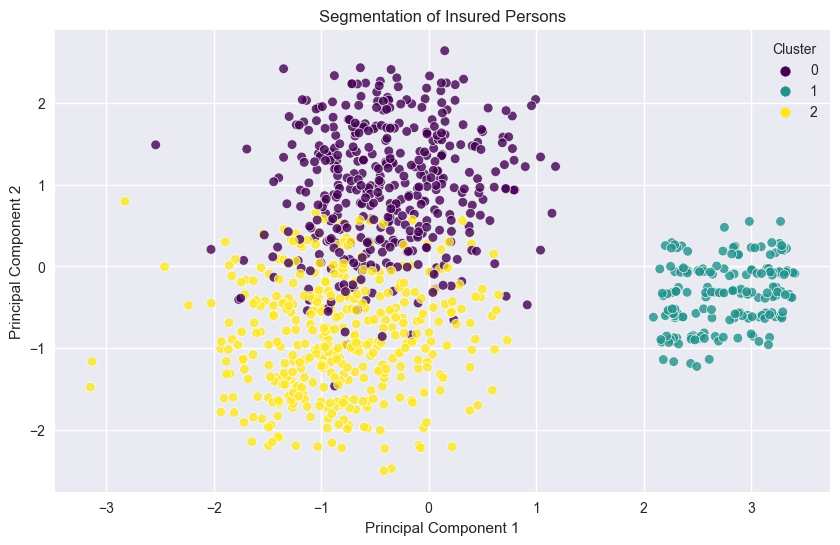

In [94]:
# Visualizing the segments using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.8)
plt.title('Segmentation of Insured Persons')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

         age_group  age_group_vehicle  edu_lvl_numeric  total_claim_amount  \
cluster                                                                      
0         1.732697           1.525060         2.116945        61731.212411   
1         1.853933           1.646067         2.078652         5418.595506   
2         1.722084           1.694789         2.156328        64799.784119   

         num_vehicles_involved  claim_type  acc_type  sum_assured_group  \
cluster                                                                   
0                     3.002387     1.00000  1.088305           0.954654   
1                     1.000000     2.52809  1.000000           0.955056   
2                     1.000000     0.00000  0.962779           0.955335   

         emg_services_notified  
cluster                         
0                     1.747017  
1                     3.488764  
2                     1.687345  


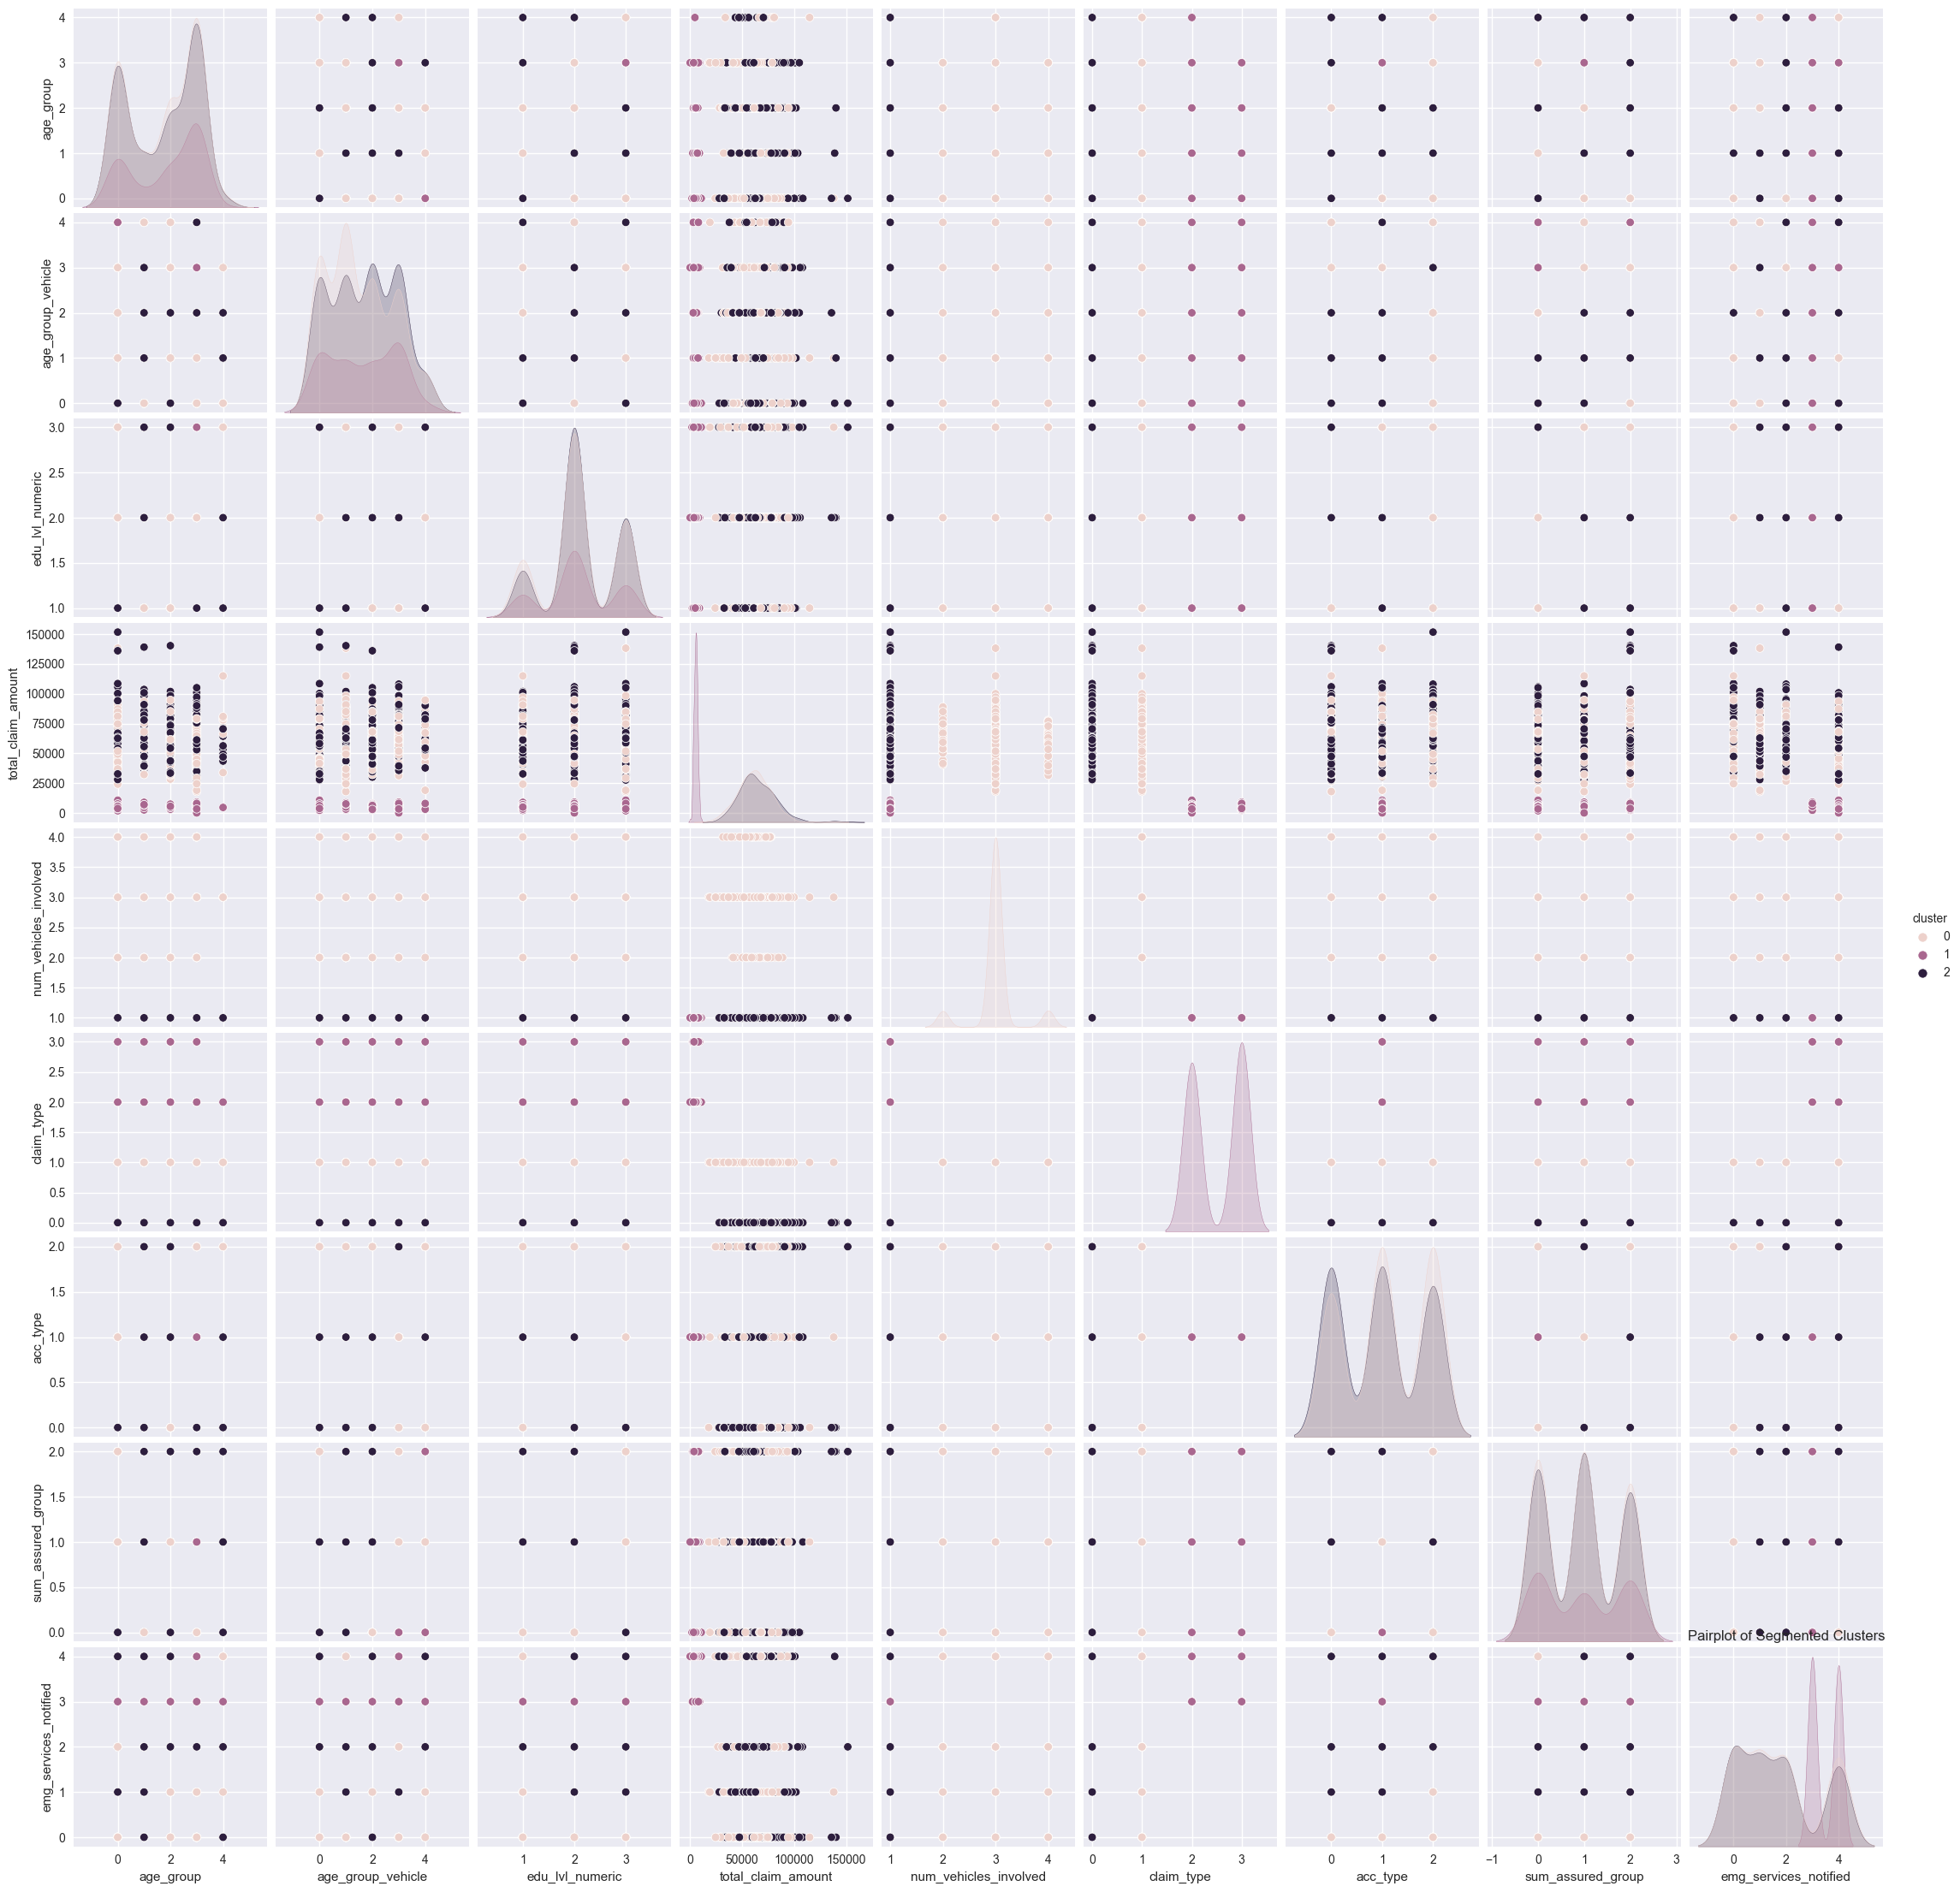

In [95]:
# Mean of selected features by cluster
cluster_means = df.groupby('cluster')[selected_features].mean()
print(cluster_means)

# Visualizing the segmentation results
sns.pairplot(data=df, hue='cluster', vars=selected_features)
plt.title('Pairplot of Segmented Clusters')
plt.show()

**Anomaly Detection using Local Outlier Factor (LOF)**

In [96]:
numeric_df = df.select_dtypes(include='number')

In [97]:
numeric_df.head()

,cust_age,policy_id,cust_region,sum_assured_group,ins_deductible,annual_prem,zip_code,insured_sex,edu_lvl,marital_status,...,car_brand,car_model,production_year,vehicle_age_at_incident,incident_period,claim_ratio,age_group,age_group_vehicle,edu_lvl_numeric,cluster
0,44,225016,0,0,2000,1007.48,342178,0,0,0,...,0,0,2022,1,0,73.589550,0,0,2,2
1,56,316183,0,0,500,1080.60,506682,0,1,1,...,1,1,2021,2,1,52.220988,1,0,3,0
2,28,174430,1,0,2000,1078.03,330854,1,2,2,...,2,2,2014,9,0,49.720323,2,1,1,2
3,53,67527,0,1,1000,1026.55,502272,0,0,0,...,3,3,2007,16,1,78.866105,1,2,2,2
4,47,259758,1,0,2000,1484.15,515656,0,3,0,...,4,4,2021,2,0,43.189705,0,0,2,0


In [98]:
# Selecting the relevant columns from numeric_df
selected_columns = ['num_vehicles_involved', 'vehicle_claim', 'bodily_injuries', 'injury_claim']

numeric_df_subset = numeric_df[selected_columns]

# 1. Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_subset)

# 2. Tuning Parameters
# Experiment with different values of n_neighbors and contamination
n_neighbors = 20  # Adjust as needed
contamination = 0.05  # Adjust as needed

# Create and fit the LOF model
lof_model = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
lof_predictions = lof_model.fit_predict(scaled_data)

# Adding the outlier scores to the DataFrame
numeric_df['LOF_anomaly_scores'] = lof_model.negative_outlier_factor_

# Adding the outlier predictions to the DataFrame
numeric_df['LOF_anomaly'] = lof_predictions

# Visualize the results or perform further analysis
# (e.g., plotting anomalies, examining high anomaly scores)

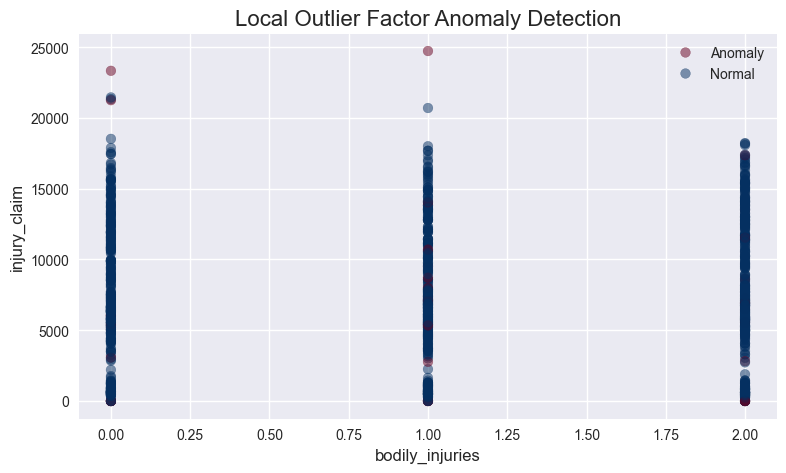

In [99]:
# Set the style
plt.style.use("seaborn")

# Create the figure and axis
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)

# Scatter plot with adjusted color mapping
scatter = ax.scatter(numeric_df['bodily_injuries'], 
                     numeric_df['injury_claim'], 
                     c=numeric_df['LOF_anomaly'], 
                     cmap='RdBu', 
                     alpha=0.5,
                     label='Normal' if numeric_df['LOF_anomaly'].all() == 1 else 'Anomaly')

# Add a title
ax.set_title("Local Outlier Factor Anomaly Detection", fontsize=16)

# Add labels
ax.set_xlabel('bodily_injuries', fontsize=12)
ax.set_ylabel('injury_claim', fontsize=12)

# Add legend
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Anomaly', 'Normal'], loc='upper right')

# Annotate anomalies
for anomaly in numeric_df[numeric_df['LOF_anomaly'] == -1]['policy_id']:
    ax.annotate(anomaly, 
                xy=(anomaly, numeric_df.loc[numeric_df['policy_id'] == anomaly, 'total_claim_amount'].values[0]),
                xytext=(anomaly, numeric_df.loc[numeric_df['policy_id'] == anomaly, 'total_claim_amount'].values[0] + 0.2),
                fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

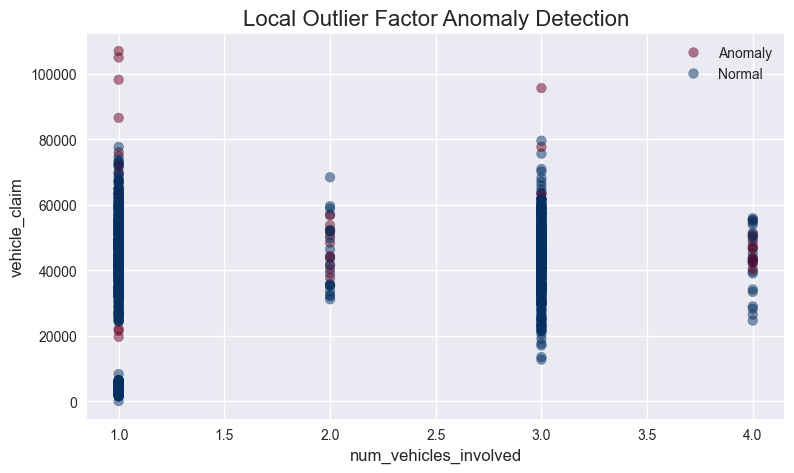

In [100]:
# Set the style
plt.style.use("seaborn")

# Create the figure and axis
fig, ax = plt.subplots(1, figsize=(9, 5), sharex=True, sharey=False)

# Scatter plot with adjusted color mapping
scatter = ax.scatter(numeric_df['num_vehicles_involved'], 
                     numeric_df['vehicle_claim'], 
                     c=numeric_df['LOF_anomaly'], 
                     cmap='RdBu', 
                     alpha=0.5,
                     label='Normal' if numeric_df['LOF_anomaly'].all() == 1 else 'Anomaly')

# Add a title
ax.set_title("Local Outlier Factor Anomaly Detection", fontsize=16)

# Add labels
ax.set_xlabel('num_vehicles_involved', fontsize=12)
ax.set_ylabel('vehicle_claim', fontsize=12)

# Add legend
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Anomaly', 'Normal'], loc='upper right')

# Annotate anomalies
for anomaly in numeric_df[numeric_df['LOF_anomaly'] == -1]['policy_id']:
    ax.annotate(anomaly, 
                xy=(anomaly, numeric_df.loc[numeric_df['policy_id'] == anomaly, 'total_claim_amount'].values[0]),
                xytext=(anomaly, numeric_df.loc[numeric_df['policy_id'] == anomaly, 'total_claim_amount'].values[0] + 0.2),
                fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()